# 데이터 다운로드

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 용량 문제로 케글에서는 압축해제 불가
!wget --load-cookies ~/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies ~/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1JxLLEBlwt8qtEOpxMSHAKRYapU7ycDaJ' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1JxLLEBlwt8qtEOpxMSHAKRYapU7ycDaJ" -O open.zip && rm -rf ~/cookies.txt
!mkdir data
!unzip open.zip -d data
!rm open.zip

--2022-11-16 13:25:16--  https://docs.google.com/uc?export=download&confirm=t&id=1JxLLEBlwt8qtEOpxMSHAKRYapU7ycDaJ
docs.google.com (docs.google.com) 해석 중... 172.217.161.238
다음으로 연결 중: docs.google.com (docs.google.com)|172.217.161.238|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 303 See Other
위치: https://doc-0s-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lkftr8j7j294d9tcpg2oic00mi4v0l9g/1668572700000/15503499385774260746/*/1JxLLEBlwt8qtEOpxMSHAKRYapU7ycDaJ?e=download&uuid=f9fe6a6f-3914-4ffb-8e9a-b095d8b67de5 [따라감]
경고: HTTP에 와일드카드 문자를 지원하지 않습니다.
--2022-11-16 13:25:17--  https://doc-0s-84-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/lkftr8j7j294d9tcpg2oic00mi4v0l9g/1668572700000/15503499385774260746/*/1JxLLEBlwt8qtEOpxMSHAKRYapU7ycDaJ?e=download&uuid=f9fe6a6f-3914-4ffb-8e9a-b095d8b67de5
doc-0s-84-docs.googleusercontent.com (doc-0s-84-docs.googleusercontent.com) 해석 중... 142.250.207.97
다음으로 연결 중: doc-0s-84-docs.googleusercontent.

# load

In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
base = '/content/drive/MyDrive/colab_data/dacondata/'

In [4]:
train_df = pd.read_csv(base + 'train.csv')
test_df = pd.read_csv(base + 'test.csv')

# EDA

## abstract

In [ ]:
train_df

,ID,img_path,mask_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,./train_imgs/BC_01_0001.png,-,63,2015-10-23,1,2,1,19.0,2.0,...,8.0,1.0,6.0,12.0,0.0,1.0,NaN,NaN,NaN,0
1,BC_01_0002,./train_imgs/BC_01_0002.png,-,51,2015-10-28,1,1,1,22.0,3.0,...,NaN,0.0,NaN,70.0,0.0,0.0,NaN,NaN,NaN,1
2,BC_01_0003,./train_imgs/BC_01_0003.png,-,37,2015-10-29,1,2,1,NaN,2.0,...,7.0,1.0,4.0,7.0,0.0,1.0,NaN,NaN,0.0,0
3,BC_01_0004,./train_imgs/BC_01_0004.png,-,54,2016-03-08,1,2,1,0.0,3.0,...,NaN,0.0,NaN,1.0,1.0,3.0,NaN,NaN,NaN,0
4,BC_01_0005,./train_imgs/BC_01_0005.png,-,57,2015-10-30,1,2,1,8.0,2.0,...,8.0,0.0,NaN,8.0,1.0,2.0,1.0,5.44,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,BC_01_3464,./train_imgs/BC_01_3464.png,-,65,2006-12-22,1,2,1,25.0,1.0,...,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1
996,BC_01_3482,./train_imgs/BC_01_3482.png,-,48,2006-11-17,1,1,1,7.0,1.0,...,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0
997,BC_01_3485,./train_imgs/BC_01_3485.png,-,64,2006-11-10,1,2,1,15.0,1.0,...,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1
998,BC_01_3502,./train_imgs/BC_01_3502.png,-,50,2006-09-22,1,1,1,7.0,1.0,...,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0


In [ ]:
# 한글 컬럼명 영문으로 변경
train_df = train_df.rename(columns={'나이':'age','수술연월일':'date', '진단명':'Diagnosis', '암의 위치':'location', '암의 개수':'count', '암의 장경':'size', 'DCIS_or_LCIS_여부':'DCIS_or_LCIS_existence'}) 
test_df = test_df.rename(columns={'나이':'age','수술연월일':'date', '진단명':'Diagnosis', '암의 위치':'location', '암의 개수':'count', '암의 장경':'size', 'DCIS_or_LCIS_여부':'DCIS_or_LCIS_existence'}) 

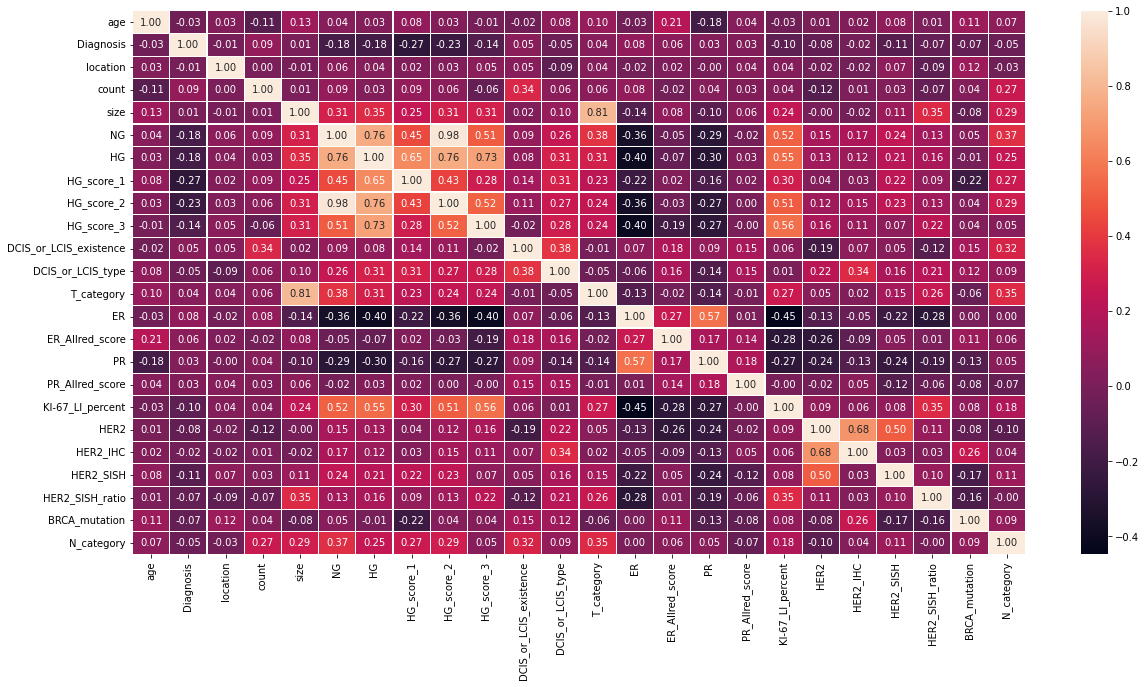

In [ ]:
# correlation heatmap
plt.figure(figsize = (20,10))
sns.heatmap(train_df.corr(), annot=True, linewidths=0.2, fmt=".2f")
plt.show()

In [ ]:
# 결측치 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   object 
 1   img_path                1000 non-null   object 
 2   mask_path               1000 non-null   object 
 3   age                     1000 non-null   int64  
 4   date                    1000 non-null   object 
 5   Diagnosis               1000 non-null   int64  
 6   location                1000 non-null   int64  
 7   count                   1000 non-null   int64  
 8   size                    931 non-null    float64
 9   NG                      949 non-null    float64
 10  HG                      914 non-null    float64
 11  HG_score_1              908 non-null    float64
 12  HG_score_2              908 non-null    float64
 13  HG_score_3              911 non-null    float64
 14  DCIS_or_LCIS_existence  1000 non-null   i

In [ ]:
# 컬럼별 uniques
for i in train_df.iloc[:,5:]:
    print(f'{i} : {train_df[i].unique()}')
    print('='*80)

HG : [1. 3. 0. 2.]
HG_score_1 : [2. 3. 0. 1.]
HG_score_3 : [1. 3. 0. 2. 4.]
DCIS_or_LCIS_existence : [3 1 2]
DCIS_or_LCIS_type : [0. 2. 1.]
T_category : [1. 2. 0. 4. 3.]
ER : [2. 1.]
ER_Allred_score : [8. 0. 7. 4. 6. 5. 3.]
PR : [1. 0.]
PR_Allred_score : [6. 5. 4. 8. 2. 7. 0. 3.]
KI-67_LI_percent : [12.   70.    7.    1.    8.    0.    5.   15.   35.   25.    3.   26.26
 10.01 50.96 89.17  1.98 17.61 28.66 20.15  6.63 17.36  3.81 13.4  79.66
 24.98 34.01 19.54 14.91 47.92  8.08 10.    0.55 11.06 15.18  1.07  3.25
 15.75 20.06 16.02 12.37 25.48 44.76 57.4  10.88  9.51 19.5   7.11  4.27
  1.19  7.96 34.29 19.31  9.31 24.96 15.77  4.97  7.35 34.89  2.14 13.97
  0.19 11.73 24.99 45.27 33.86 21.93 15.5   8.21  3.03  5.51  5.48  0.4
  7.03 25.94  6.75  8.54 20.22 20.93  6.38 31.65 18.86 36.58  4.6  31.93
 44.92 11.84 16.37  2.6  26.84  8.41  0.42 42.26 11.78 19.38 16.68  8.99
  9.32  3.51 45.37 21.53 50.82 56.99 24.15 17.   36.4  28.27 21.11 15.51
 34.25 12.91  5.5  42.81 85.71 47.79  5.38 5

In [ ]:
train_df.describe()

,age,Diagnosis,location,count,size,NG,HG,HG_score_1,HG_score_2,HG_score_3,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
count,1000.000000,1000.000000,1000.000000,1000.000000,931.000000,949.000000,914.000000,908.000000,908.000000,911.000000,...,703.000000,999.000000,547.000000,765.000000,986.000000,976.000000,247.000000,175.000000,55.000000,1000.000000
mean,53.679000,1.289000,1.561000,1.133000,18.375564,2.070601,1.897155,2.588106,2.144273,1.428101,...,7.014225,0.641642,6.049360,18.037229,0.247465,1.253074,0.129555,2.460457,0.145455,0.514000
std,11.253471,0.796312,0.559099,0.339745,12.037144,0.692234,0.713147,0.654011,0.655820,0.714866,...,1.125879,0.479758,2.734821,18.846473,0.431758,0.939444,0.336495,7.399121,0.524164,0.500054
min,25.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,1.000000,1.000000,1.000000,11.000000,2.000000,1.000000,2.000000,2.000000,1.000000,...,7.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,1.130000,0.000000,0.000000
50%,52.000000,1.000000,2.000000,1.000000,17.000000,2.000000,2.000000,3.000000,2.000000,1.000000,...,7.000000,1.000000,6.000000,10.000000,0.000000,1.000000,0.000000,1.270000,0.000000,1.000000
75%,62.000000,1.000000,2.000000,1.000000,23.000000,3.000000,2.000000,3.000000,3.000000,2.000000,...,8.000000,1.000000,7.000000,25.000000,0.000000,2.000000,0.000000,1.675000,0.000000,1.000000
max,93.000000,4.000000,3.000000,2.000000,110.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,8.000000,1.000000,54.000000,97.000000,1.000000,3.000000,1.000000,94.000000,2.000000,1.000000


## columns

### N_category
림프관 전이와 다른 numeric column들의 관계를 확인

In [ ]:
# N_category별 size의 평균
train_df.groupby('N_category').agg({'size':np.mean})

,size
N_category,
0,14.507720
1,21.568431


In [ ]:
# N_category별 ER_Allred_score 평균
train_df.groupby('N_category').agg({'ER_Allred_score':np.mean})

,ER_Allred_score
N_category,
0,6.934375
1,7.080940


In [ ]:
# N_category별 PR_Allred_score 평균
train_df.groupby('N_category').agg({'PR_Allred_score':np.mean})

,PR_Allred_score
N_category,
0,6.258475
1,5.890675


In [ ]:
# N_category별 KI-67_LI_percent 평균
train_df.groupby('N_category').agg({'KI-67_LI_percent':np.mean})

,KI-67_LI_percent
N_category,
0,14.136667
1,21.141197


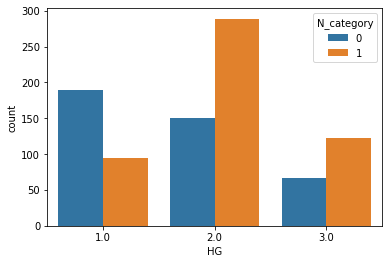

In [ ]:
# HG unique별 N_category count plot
sns.countplot(data=train_df, x='HG', hue='N_category')

### Boxplots

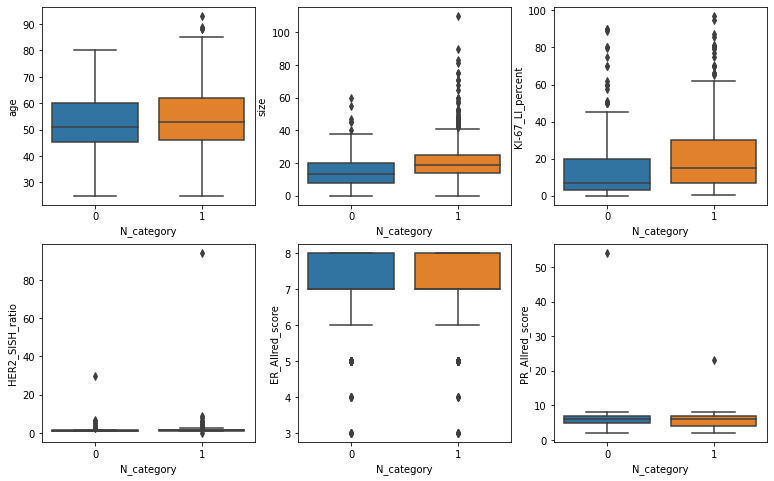

In [ ]:
# N_category와 numeric columns boxplot
plt.figure(figsize=(13,8))
plt.subplot(233)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='N_category')
plt.subplot(232)
sns.boxplot(data=train_df, y='size', x='N_category')
plt.subplot(231)
sns.boxplot(data=train_df, y='age', x='N_category')
plt.subplot(234)
sns.boxplot(data=train_df, y='HER2_SISH_ratio', x='N_category')
plt.subplot(235)
sns.boxplot(data=train_df, y='ER_Allred_score', x='N_category')
plt.subplot(236)
sns.boxplot(data=train_df, y='PR_Allred_score', x='N_category')
plt.show()

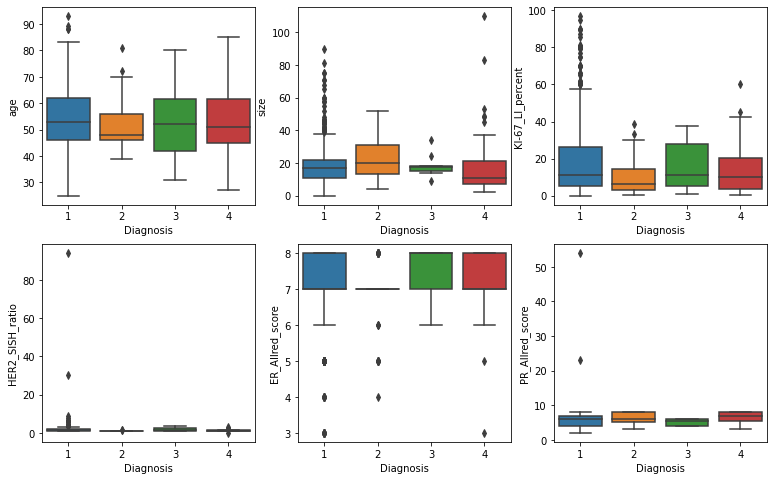

In [ ]:
# Diagnosis와 numeric columns boxplot
plt.figure(figsize=(13,8))
plt.subplot(233)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='Diagnosis')
plt.subplot(232)
sns.boxplot(data=train_df, y='size', x='Diagnosis')
plt.subplot(231)
sns.boxplot(data=train_df, y='age', x='Diagnosis')
plt.subplot(234)
sns.boxplot(data=train_df, y='HER2_SISH_ratio', x='Diagnosis')
plt.subplot(235)
sns.boxplot(data=train_df, y='ER_Allred_score', x='Diagnosis')
plt.subplot(236)
sns.boxplot(data=train_df, y='PR_Allred_score', x='Diagnosis')
plt.show()

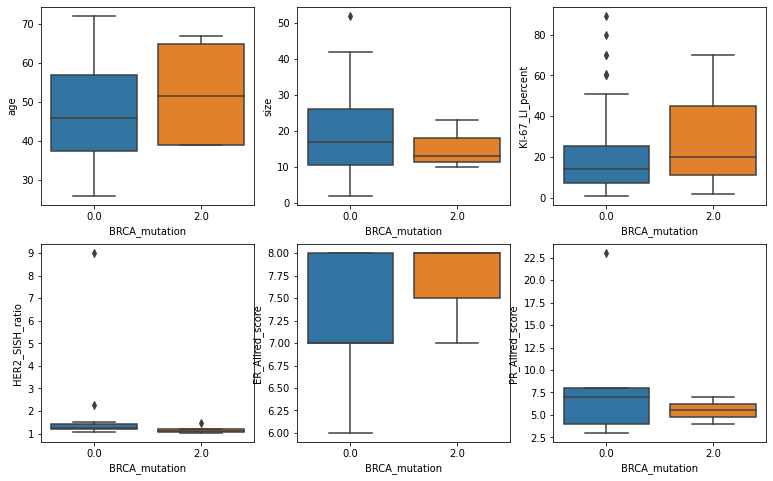

In [ ]:
# Diagnosis와 numeric columns boxplot
plt.figure(figsize=(13,8))
plt.subplot(233)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='BRCA_mutation')
plt.subplot(232)
sns.boxplot(data=train_df, y='size', x='BRCA_mutation')
plt.subplot(231)
sns.boxplot(data=train_df, y='age', x='BRCA_mutation')
plt.subplot(234)
sns.boxplot(data=train_df, y='HER2_SISH_ratio', x='BRCA_mutation')
plt.subplot(235)
sns.boxplot(data=train_df, y='ER_Allred_score', x='BRCA_mutation')
plt.subplot(236)
sns.boxplot(data=train_df, y='PR_Allred_score', x='BRCA_mutation')
plt.show()

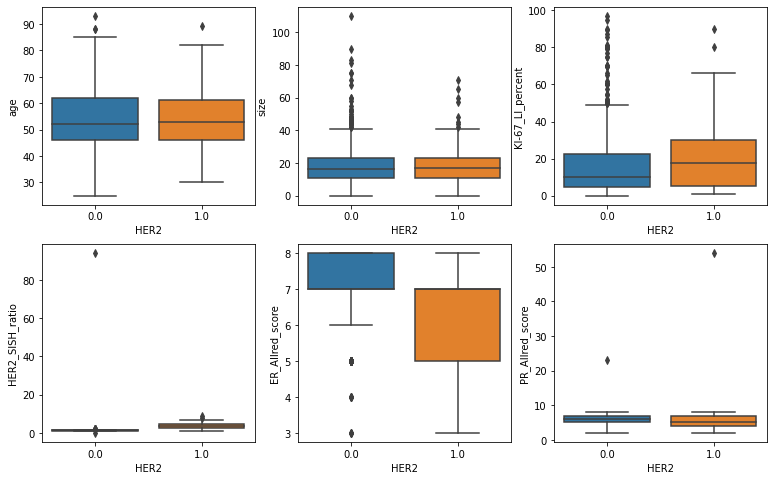

In [ ]:
# HER2와 numeric columns boxplot
plt.figure(figsize=(13,8))
plt.subplot(233)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='HER2')
plt.subplot(232)
sns.boxplot(data=train_df, y='size', x='HER2')
plt.subplot(231)
sns.boxplot(data=train_df, y='age', x='HER2')
plt.subplot(234)
sns.boxplot(data=train_df, y='HER2_SISH_ratio', x='HER2')
plt.subplot(235)
sns.boxplot(data=train_df, y='ER_Allred_score', x='HER2')
plt.subplot(236)
sns.boxplot(data=train_df, y='PR_Allred_score', x='HER2')
plt.show()

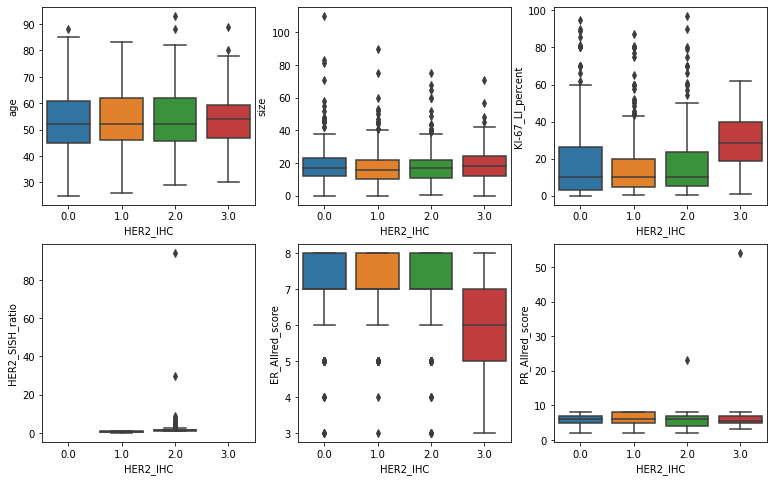

In [ ]:
# HER2_IHC와 numeric columns boxplot
plt.figure(figsize=(13,8))
plt.subplot(233)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='HER2_IHC')
plt.subplot(232)
sns.boxplot(data=train_df, y='size', x='HER2_IHC')
plt.subplot(231)
sns.boxplot(data=train_df, y='age', x='HER2_IHC')
plt.subplot(234)
sns.boxplot(data=train_df, y='HER2_SISH_ratio', x='HER2_IHC')
plt.subplot(235)
sns.boxplot(data=train_df, y='ER_Allred_score', x='HER2_IHC')
plt.subplot(236)
sns.boxplot(data=train_df, y='PR_Allred_score', x='HER2_IHC')
plt.show()

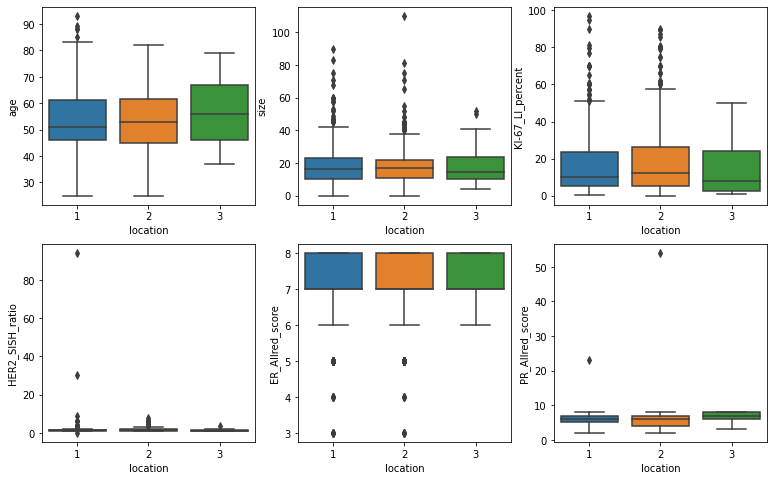

In [ ]:
# location과 numeric columns boxplot
plt.figure(figsize=(13,8))
plt.subplot(233)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='location')
plt.subplot(232)
sns.boxplot(data=train_df, y='size', x='location')
plt.subplot(231)
sns.boxplot(data=train_df, y='age', x='location')
plt.subplot(234)
sns.boxplot(data=train_df, y='HER2_SISH_ratio', x='location')
plt.subplot(235)
sns.boxplot(data=train_df, y='ER_Allred_score', x='location')
plt.subplot(236)
sns.boxplot(data=train_df, y='PR_Allred_score', x='location')
plt.show()

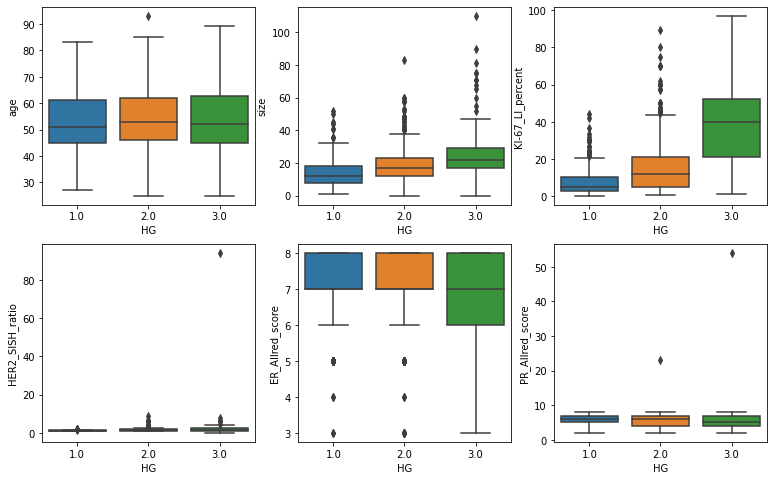

In [ ]:
# HG와 numeric columns boxplot
plt.figure(figsize=(13,8))
plt.subplot(233)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='HG')
plt.subplot(232)
sns.boxplot(data=train_df, y='size', x='HG')
plt.subplot(231)
sns.boxplot(data=train_df, y='age', x='HG')
plt.subplot(234)
sns.boxplot(data=train_df, y='HER2_SISH_ratio', x='HG')
plt.subplot(235)
sns.boxplot(data=train_df, y='ER_Allred_score', x='HG')
plt.subplot(236)
sns.boxplot(data=train_df, y='PR_Allred_score', x='HG')
plt.show()

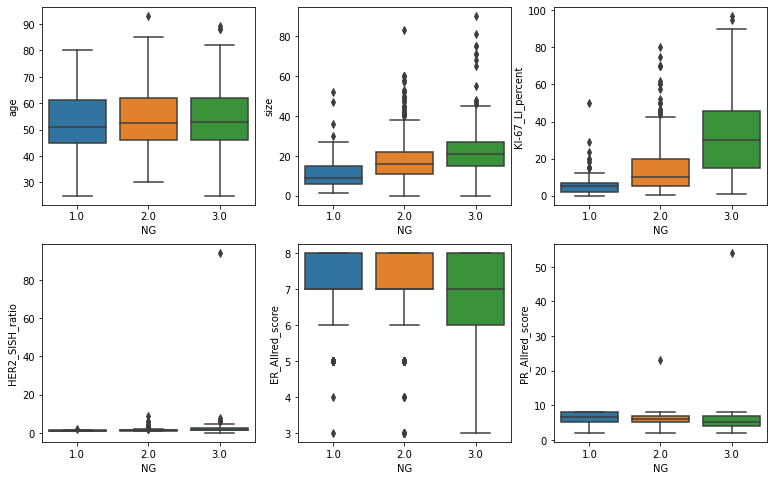

In [ ]:
# NG와 numeric columns boxplot
# HG,NG는 KI-67_LI_percent, size와 양의 상관관계로 보인다.
plt.figure(figsize=(13,8))
plt.subplot(233)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='NG')
plt.subplot(232)
sns.boxplot(data=train_df, y='size', x='NG')
plt.subplot(231)
sns.boxplot(data=train_df, y='age', x='NG')
plt.subplot(234)
sns.boxplot(data=train_df, y='HER2_SISH_ratio', x='NG')
plt.subplot(235)
sns.boxplot(data=train_df, y='ER_Allred_score', x='NG')
plt.subplot(236)
sns.boxplot(data=train_df, y='PR_Allred_score', x='NG')
plt.show()

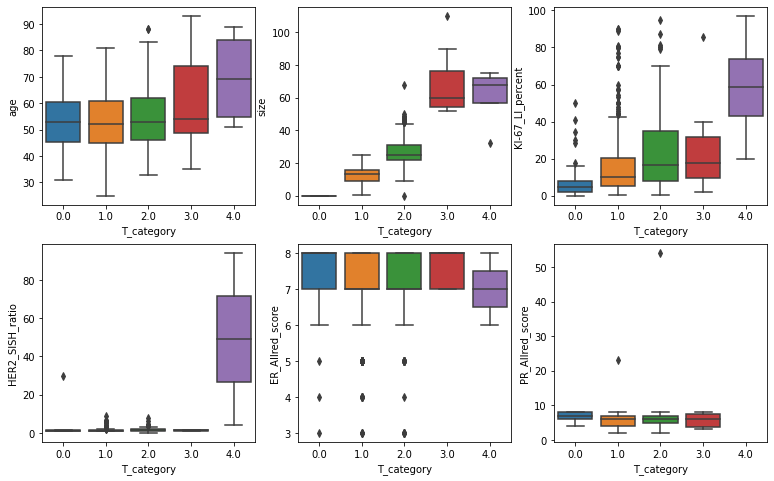

In [ ]:
# T_category와 numeric columns boxplot
# T-category 4번과 KI-67이 중요해보인다.
plt.figure(figsize=(13,8))
plt.subplot(233)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='T_category')
plt.subplot(232)
sns.boxplot(data=train_df, y='size', x='T_category')
plt.subplot(231)
sns.boxplot(data=train_df, y='age', x='T_category')
plt.subplot(234)
sns.boxplot(data=train_df, y='HER2_SISH_ratio', x='T_category')
plt.subplot(235)
sns.boxplot(data=train_df, y='ER_Allred_score', x='T_category')
plt.subplot(236)
sns.boxplot(data=train_df, y='PR_Allred_score', x='T_category')
plt.show()

In [ ]:
# 종양이 피부나 흉벽까지 확장되는건 사이즈보다 KI-67의 수치가 중요하다.
# 종양이 피부나 흉벽까지 확장된 사람들은 모두 림프관 전이가 되었다.
train_df.pivot_table(index='N_category', columns='T_category', values='KI-67_LI_percent', aggfunc=np.mean)

T_category,0.0,1.0,2.0,3.0,4.0
N_category,,,,,
0,6.618333,13.375882,24.546667,40.000000,NaN
1,19.997500,18.734570,22.862732,22.659091,58.455


### KI-67_LI_percent
종양의 과도한 확장은 림프관 전이에 영향을 끼치며 종양의 확장에 관여하는 KI-67_LI_percent에 대해서 살펴보았다.

In [ ]:
# KI-67_LI_percent의 N_category와 HG별 평균
train_df.pivot_table(index='N_category', columns='HG', values='KI-67_LI_percent', aggfunc=np.mean)

HG,1.0,2.0,3.0
N_category,,,
0,6.597068,17.177629,38.291875
1,11.272838,16.625697,40.428229


In [ ]:
# KI-67_LI_percent의 N_category와 NG별 평균
train_df.pivot_table(index='N_category', columns='NG', values='KI-67_LI_percent', aggfunc=np.mean)

NG,1.0,2.0,3.0
N_category,,,
0,5.672273,13.426204,33.477667
1,4.913000,14.674791,33.298267


In [ ]:
# KI-67_LI_percent의 HG_score_3와 HG별 평균
train_df.pivot_table(index='HG_score_3', columns='HG', values='KI-67_LI_percent', aggfunc=np.mean)

HG,1.0,2.0,3.0
HG_score_3,,,
1.0,8.268599,15.768889,5.500000
2.0,NaN,21.319322,35.251791
3.0,NaN,40.000000,44.616667


In [ ]:
# 위 결과에서 HG_score_3의 unique인 4가 나오지 않아 존재를 확인해봤다
# 평균이 존재하지 않은 적은 수의 컬럼만이 있다.
train_df['HG'].loc[train_df['HG_score_3'] == 4]

746    1.0
749    NaN
938    NaN
Name: HG, dtype: float64

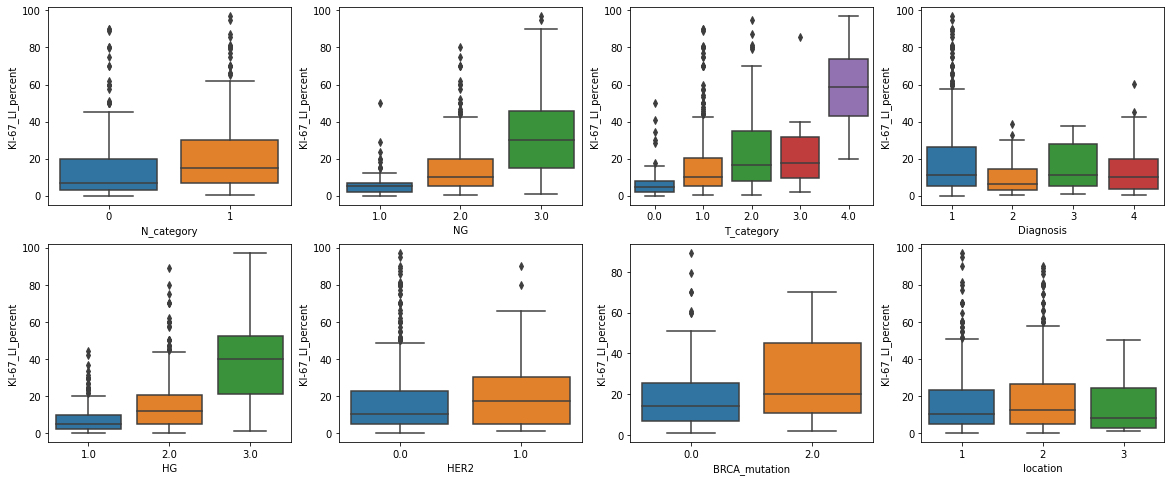

In [ ]:
# KI-67_LI_percent와 다른 대표적 catecorical column들의 boxplot
plt.figure(figsize=(20,8))
plt.subplot(243)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='T_category')
plt.subplot(242)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='NG')
plt.subplot(241)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='N_category')
plt.subplot(244)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='Diagnosis')
plt.subplot(245)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='HG')
plt.subplot(246)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='HER2')
plt.subplot(247)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='BRCA_mutation')
plt.subplot(248)
sns.boxplot(data=train_df, y='KI-67_LI_percent', x='location')
plt.show()

### Size

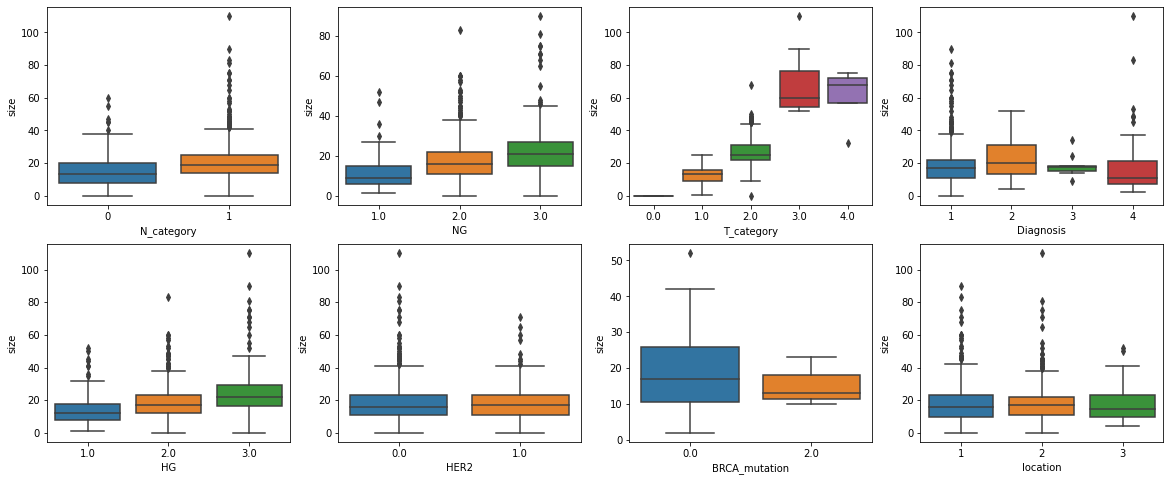

In [ ]:
# size와 다른 대표적 catecorical column들의 boxplot
plt.figure(figsize=(20,8))
plt.subplot(243)
sns.boxplot(data=train_df, y='size', x='T_category')
plt.subplot(242)
sns.boxplot(data=train_df, y='size', x='NG')
plt.subplot(241)
sns.boxplot(data=train_df, y='size', x='N_category')
plt.subplot(244)
sns.boxplot(data=train_df, y='size', x='Diagnosis')
plt.subplot(245)
sns.boxplot(data=train_df, y='size', x='HG')
plt.subplot(246)
sns.boxplot(data=train_df, y='size', x='HER2')
plt.subplot(247)
sns.boxplot(data=train_df, y='size', x='BRCA_mutation')
plt.subplot(248)
sns.boxplot(data=train_df, y='size', x='location')
plt.show()

### Date(수술연월일)

In [ ]:
# date를 다른column들과 관계를 확인해 보기 위해 numerical한 수치로 변환

import datetime as dt
someday = pd.to_datetime('2000-01-01')
train_df['date'] = pd.to_datetime(train_df['date']) - someday
train_df['date'] = train_df['date'].dt.days / 1000

test_df['date'] = pd.to_datetime(test_df['date']) - someday
test_df['date'] = test_df['date'].dt.days / 1000

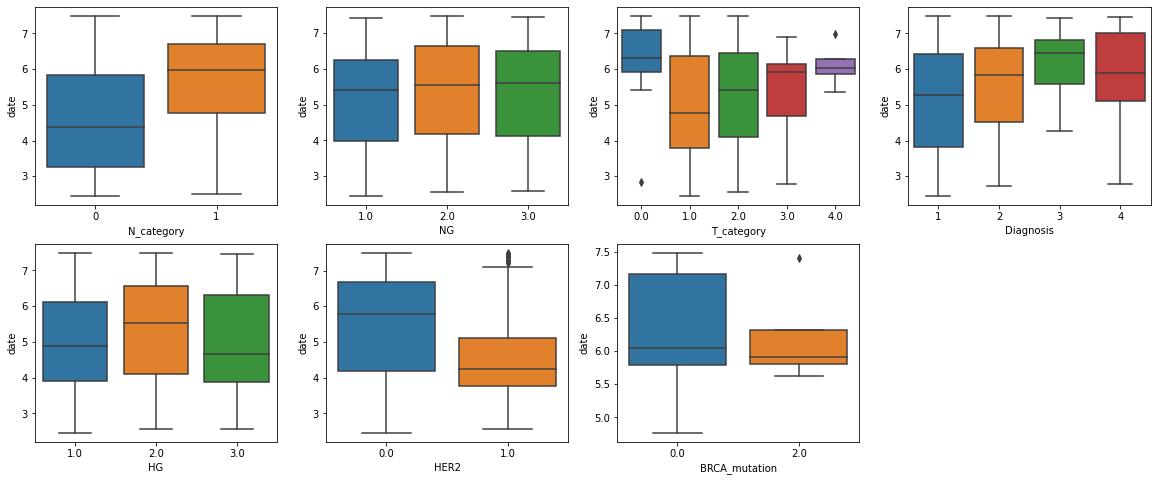

In [ ]:
# date와 다른 대표적 catecorical column들의 boxplot
plt.figure(figsize=(20,8))
plt.subplot(243)
sns.boxplot(data=train_df, y='date', x='T_category')
plt.subplot(242)
sns.boxplot(data=train_df, y='date', x='NG')
plt.subplot(241)
sns.boxplot(data=train_df, y='date', x='N_category')
plt.subplot(244)
sns.boxplot(data=train_df, y='date', x='Diagnosis')
plt.subplot(245)
sns.boxplot(data=train_df, y='date', x='HG')
plt.subplot(246)
sns.boxplot(data=train_df, y='date', x='HER2')
plt.subplot(247)
sns.boxplot(data=train_df, y='date', x='BRCA_mutation')
plt.show()

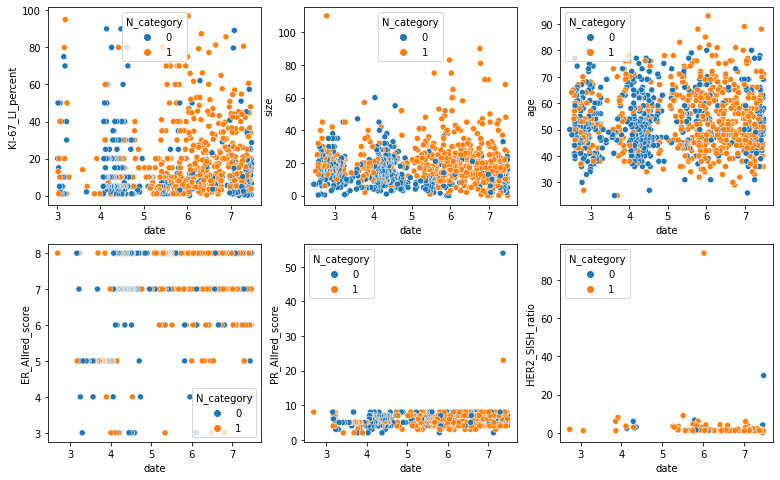

In [ ]:
# 특정구간의 date에 N_category가 뭉쳐있고, size와 age등에 따른 분포를 볼수있는 scatterplot
plt.figure(figsize=(13,8))
plt.subplot(231)
sns.scatterplot(data= train_df, x='date', y='KI-67_LI_percent', hue='N_category')
plt.subplot(232)
sns.scatterplot(data= train_df, x='date', y='size', hue='N_category')
plt.subplot(233)
sns.scatterplot(data= train_df, x='date', y='age', hue='N_category')
plt.subplot(234)
sns.scatterplot(data= train_df, x='date', y='ER_Allred_score', hue='N_category')
plt.subplot(235)
sns.scatterplot(data= train_df, x='date', y='PR_Allred_score', hue='N_category')
plt.subplot(236)
sns.scatterplot(data= train_df, x='date', y='HER2_SISH_ratio', hue='N_category')

### PR_Allred_score

In [ ]:
# PR_Allred_score의 unique중 8을 넘는 이상치가 있다. 
train_df['PR_Allred_score'].unique()

array([ 6., nan,  4.,  8.,  2.,  7.,  5., 23., 54.,  3.])

### etc.

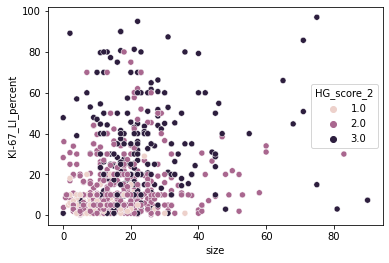

In [ ]:
# HG_score_2는 3으로 갈수록 size와 KI-67_LI_percent에서 높은 수치를 보이는 경향이 있다.
sns.scatterplot(data= train_df, x='size', y='KI-67_LI_percent', hue='HG_score_2')

In [ ]:
# HG_score_2와 NG의 correlation은 상당히 높아보인다.
train_df['NG'].corr(train_df['HG_score_2'])

0.979197474333308

In [ ]:
# 하지만 NG, HG_score_2가 서로 다르거나 둘다 nan값인 컬럼을 확인해보면 136개로, 둘다 nan인 row들을 같은 값으로 본 위의 correlation은 오류가 있다.
train_df.loc[train_df['NG'] != train_df['HG_score_2']][['NG','HG_score_2']]

,NG,HG_score_2
2,2.0,NaN
6,2.0,NaN
9,1.0,NaN
11,2.0,NaN
17,NaN,NaN
...,...,...
972,2.0,3.0
980,1.0,2.0
981,1.0,2.0
982,1.0,2.0
